### Import the required libraries

In [2]:
import nltk                               # Python library for NLP (Natural Language Processing)
from nltk.corpus import twitter_samples   # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt           # library for visualization
import random                             # pseudo-random number generator
import re                                 # library for regular expression operations
import string                             # for string operations

from nltk.corpus import stopwords         # module for stop words that come with NLTK
from nltk.stem import PorterStemmer       # module for stemming (useful for text processing)
from nltk.tokenize import TweetTokenizer  # module for tokenizing strings
from utils import process_tweet, build_freqs # Our functions for NLP

### About the Twitter dataset  
The sample dataset from NLTK is separated into positive and negative tweets.  
It contains 5000 positive tweets and 5000 negative tweets exactly.  
The exact match between these classes is not a coincidence.  
The intention is to have a balanced dataset. That does not reflect the real  
distributions of positive and negative classes in live Twitter streams.  
It is just because balanced datasets simplify the design of most computational  
methods that are required for sentiment analysis. However, it is better  
to be aware that this balance of classes is artificial.


In [3]:
# Download sample twitter dataset 
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/xamanek/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

Load the text fields of the positive and negative tweets by using the module's ```strings()``` method.

In [4]:
# Select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

Print a report with the number of positive and negative tweets.  
It is also essential to know the data structure of the datasets.

In [5]:
print( "Number of positive tweets: ", len(all_positive_tweets))
print( "Number of negative tweets: ", len(all_negative_tweets))
print( "" )
print( '\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print( 'The type of a tweet entry is: ', type(all_negative_tweets[0]) )

Number of positive tweets:  5000
Number of negative tweets:  5000


The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


Plot the data to see the distribution of the positive and negative tweets.

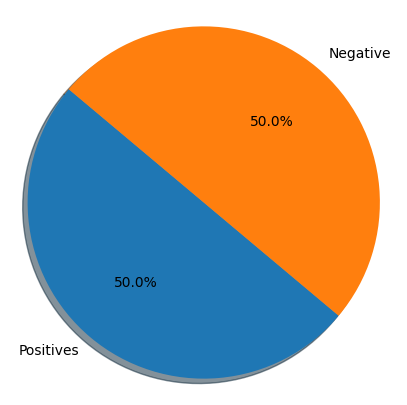

In [6]:
# Declare a figure with a custom size
fig = plt.figure( figsize = (5, 5) )

# Labels for the two classes 
labels = 'Positives', 'Negative'

# Sizes for each slide 
sizes = [ len(all_positive_tweets), len(all_negative_tweets) ]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie( sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140 )

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis( 'equal' )

# Display the chart
plt.show()

Looking at raw texts  
Before anything else, we can print a couple of tweets from the dataset to see how they look.  

In [7]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

Want to say a huge thanks to @WarriorAssaultS @uktac @BolleSafety @Mechanix_Wear @Airtech_Studios @Hexmags #FF Thanks for the support :)
I just watched a video about a girl being "allergic" to the sun :( that's depressing


### Preprocess raw text for Sentiment Analysis  
Data preprocessing is one of the critical steps in any machine learning project.  
It includes cleaning and formatting the data before feeding into a machine learning algorithm.  
For NLP, the preprocessing steps are comprised of the following tasks:  
  
1. Remove any punctuation or irrelevant characters (special characters, white spaces, etc.)
2. Tokenization
3. Remove stop words
4. Lemmatization/Stemming
5. Lowercasing
6. Remove any extra spaces


In [8]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [9]:
# Download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/xamanek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Remove hyperlinks, Twitter marks and styles

In [10]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenize the string

In [12]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer( 
  preserve_case=False, strip_handles=True, reduce_len=True 
)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


Remove stop words and punctuations

In [13]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

Clean up the tokenized tweet.

In [14]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

# Go through every word in your tokens list
for word in tweet_tokens: 
    # remove stopwords and remove punctuation
    if (word not in stopwords_english and  
        word not in string.punctuation):  
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


### Stemming 
Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form.  
For instance, if there are two words in the dataset: 'JUMPING' and 'JUMPED', the stem of both words is 'jump'.  
Stemming is essential in sentiment analysis because it helps to reduce the size of the vocabulary.  

In [15]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


Process the tweet using ```process_tweet()``` method. ( inside the utils.py file )

In [16]:
# choose the same tweet
tweet = all_positive_tweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result



My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

preprocessed tweet:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
